In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from numpy import pi,linspace,sin,exp,round,zeros,arange,real, ones
from matplotlib.pyplot import figure
from scipy.sparse import coo_matrix
from time import time

N = [128, 258, 512, 1024]
Time_exe = [0.013231992721557617, 0.029224157333374023, 0.08623099327087402, 0.11859416961669922]


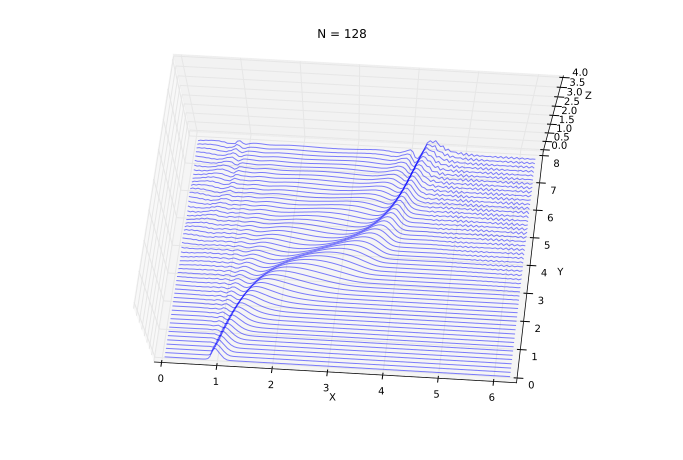

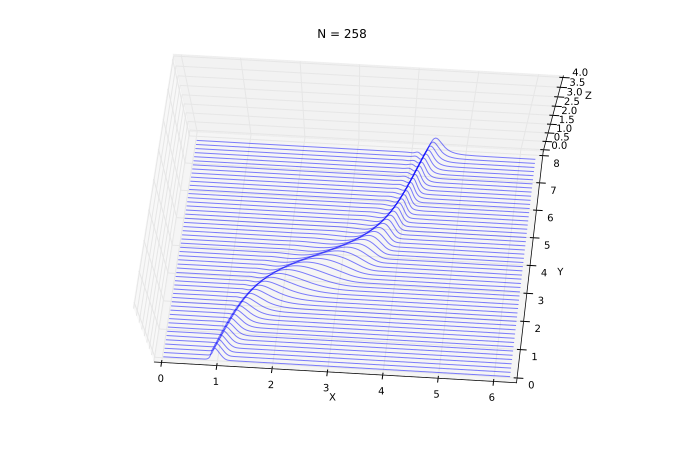

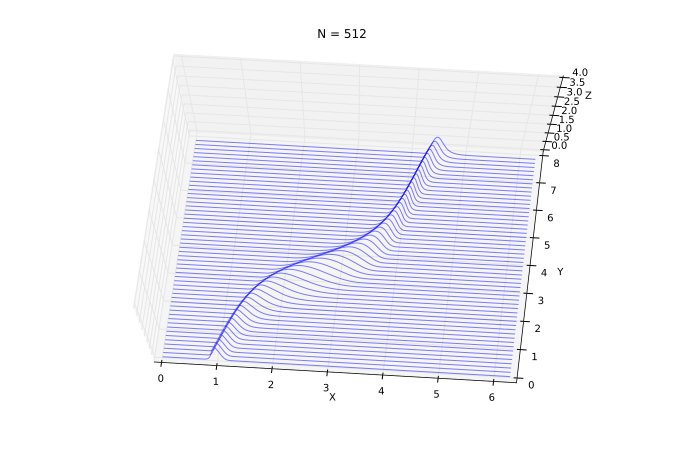

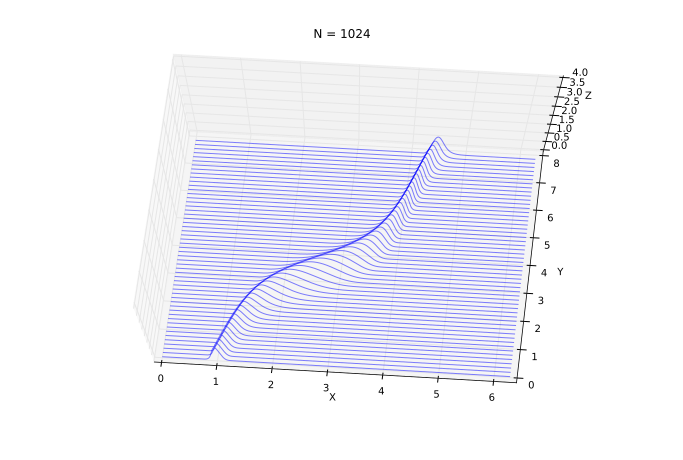

In [2]:
M = [128, 258, 512, 1024]
T = []
for N in M:
    t0 = time()
    # Set up grid and differentiation matrix:
    h = 2*pi/N; x = h*arange(1,N+1);
    t = 0.0; dt = h/4.0
    c = 0.2 + sin(x-1.0)**2.0
    v = exp(-100.0*(x-1.0)**2.0); vold = exp(-100.0*(x-0.2*dt-1.0)**2.0);

    # Differentation Matrix Leap-Frog
    e = 0.5*ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(0,N); e3[N-2]= N - 2; e3[N-1]= N - 2;

    D= coo_matrix((-e,(e2,e3)),shape=(N,N)) + coo_matrix((e,(e1,e2)),shape=(N,N))
    D = D / h

    # Time-stepping by leap-frog formula
    tmax = 8.0; tplot = 0.15;
    plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
    nplots = int(round(tmax/tplot))
    data = []
    data.append(list(zip(x, v)))
    tdata = zeros(nplots+1)
    for i in range(1,nplots):
        for n in range(plotgap):
            t = t + dt
            vnew = vold - 2.0*dt*c * (D.dot(v))
            vold = v; v = vnew;
        data.append(list(zip(x, v)))
        tdata[i] = t;
    tf = time()
    t_exe = tf - t0 
    T.append(t_exe)
    fig = figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    poly = LineCollection(data)
    poly.set_alpha(0.5)
    ax.add_collection3d(poly, zs=tdata, zdir='y')
    ax.set_xlabel('X')
    ax.set_xlim3d(0, 2*pi)
    ax.set_ylabel('Y')
    ax.set_ylim3d(0, 8)
    ax.set_zlabel('Z')
    ax.set_zlim3d(0, 4)
    ax.view_init(75,-85)
    ax.set_title('N = ' + str(N))

print'N =', M    
print 'Time_exe =', T   
    
    



'128'